In [2]:
#Importando a biblioteca
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#alterando o tipo de dados
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
#apagando valores nulos em colunas específicas
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Substituindo os valores nulos por zero
df.fillna(0, inplace=True)

In [ ]:
#Removendo linhas com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [17]:
#Criando a coluna de Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [15]:
#maior valor de receita
df["Receita"].max()

3544.0

In [16]:
df["Receita"].min()

3.34

In [17]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [18]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [19]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [21]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [9]:
#Transformando a coluna de data em inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [25]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [19]:
#Transformando a coluna de data em Data
df["Data"] = pd.to_datetime(df["Data"])

In [27]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [20]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [32]:
#Criando uma nova coluna com o ano
df["Ano da Venda"] = df["Data"].dt.year

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano da Venda
110,Aracaju,2018-01-01,38.15,1520,4,152.60,2018
98,Salvador,2019-01-01,231.76,1036,3,695.28,2019
196,Salvador,2019-01-02,145.09,1036,2,290.18,2019
15,Fortaleza,2019-01-01,195.05,1002,2,390.10,2019
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,2018


In [33]:
#Extraindo mês e dia
df ["mes_venda"], df["dia_venda"] = df["Data"].dt.month, df["Data"].dt.day

In [33]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano da Venda,mes_venda,dia_venda
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,2018,1,1
94,Natal,2019-01-02,33.24,1037,1,33.24,2019,1,2
106,Aracaju,2018-01-01,16.32,1520,7,114.24,2018,1,1
27,Aracaju,2018-01-01,3.39,1523,4,13.56,2018,1,1
135,Recife,2019-03-02,10.79,983,5,53.95,2019,3,2


In [34]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [36]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [37]:
df.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano da Venda,mes_venda,dia_venda,diferenca_dias
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days
83,Aracaju,2018-01-01,14.44,1520,5,72.20,2018,1,1,0 days
133,Natal,2019-01-02,153.71,1035,1,153.71,2019,1,2,366 days
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days


In [38]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [39]:
df.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano da Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,2019,1,1,365 days,1
4,Natal,2019-03-09,699.00,853,3,2097.00,2019,3,9,432 days,1
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,1,2,366 days,1
133,Natal,2019-01-02,153.71,1035,1,153.71,2019,1,2,366 days,1
164,Natal,2019-01-02,6.59,1035,1,6.59,2019,1,2,366 days,1
101,Aracaju,2018-01-01,16.62,1520,9,149.58,2018,1,1,0 days,1
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,2019,1,1,365 days,1


In [42]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [43]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano da Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [11]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

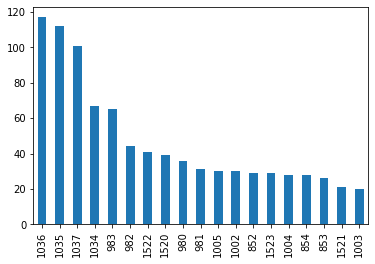

In [12]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

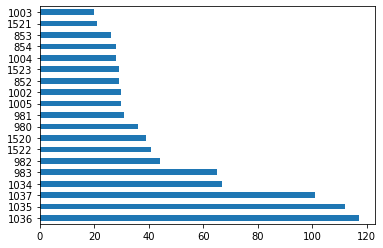

In [13]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

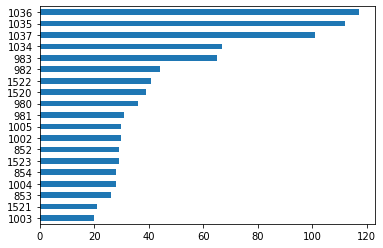

In [15]:
#Gráfico de barras horizontais maior para o menor
df["LojaID"].value_counts(ascending=True).plot.barh();

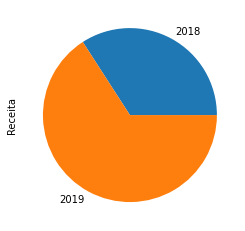

In [21]:
#gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [22]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

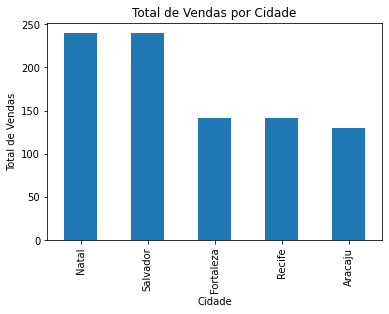

In [23]:
#Adicionando título e texto nos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

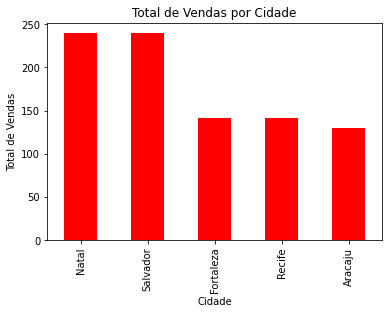

In [24]:
#Alterando a cor
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade",color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [25]:
#Alterando estilo
plt.style.use("ggplot")

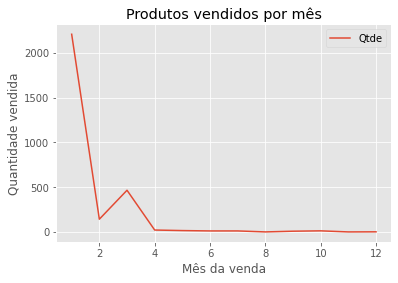

In [30]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Produtos vendidos por mês")
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade vendida")
plt.legend();

In [34]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano da Venda"] == 2019]

Text(0, 0.5, 'Quantidade vendida')

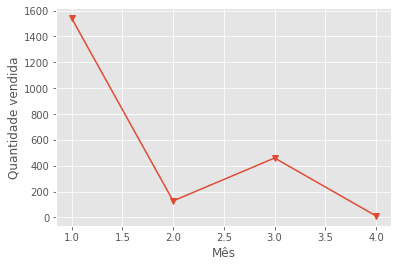

In [36]:
#Total de produtos vendidos por mês em 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Quantidade vendida")

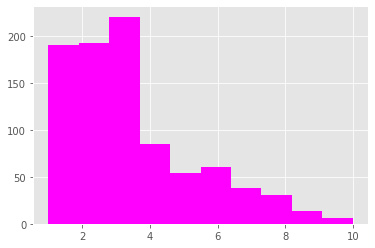

In [38]:
#Histograma
plt.hist(df["Qtde"], color="magenta");

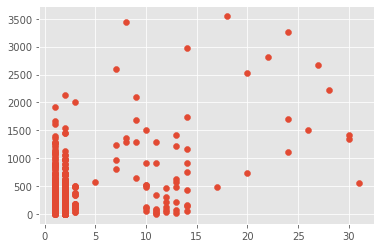

In [41]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

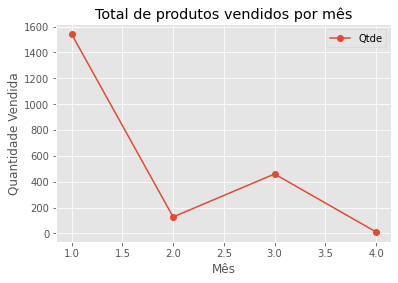

In [43]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o")
plt.title("Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.savefig("grafico_qtde_mes.png");